# <span style="color: steelblue;">Validation of scaLR Models Using the Gene Recall Curve</span>

## <span style="color: steelblue;"> Keypoints </span>

1. This notebook is designed as a tutorial for using the gene recall curve from the scaLR library.
   - It covers two methods to generate the gene recall curve using the library, both of which are included in this tutorial.
2. The tutorial also explains why the gene recall curve is a crucial measure for evaluating model efficacy.


## <span style="color: steelblue;">What is gene recall?</span>
- Gene recall curve is a method to detect how capable our model is for ranking genes which are actually important.

- As the term says, we want to check the recall of genes(literature - proven important) in the model generated ranked genes.


## <span style="color: steelblue;">What are the current metrics to understand model performance results?</span>
- There are many, some of which are listed below.

1. Classification tasks
    - accuracy
    - precision
    - recall
    - f-score
    - etc
2. Regression tasks
    - MAE
    - MSE
    - etc.

- Once the above metrics are optimized, we can proceed with downstream analysis of the top genes.

- Key genes can be identified using SHAP (SHapley Additive exPlanations) analysis for neural networks.

- Differential gene expression analysis can be performed to further validate the important genes.

- The gene recall curve is a crucial metric for evaluating a model's performance, as it assesses literature gene recall and indicates whether the model is effectively capturing important genes in the top ranks. 


## <span style="color: steelblue;">Why is gene recall an important metric and how to interpret it?</span>

- Let's say we have two models, each producing a list of 500 ranked genes related to a specific disease or trait. We want to compare these models based on the most important genes they identify for that disease or trait, which will then be used for further analysis.

- By comparing the top K genes (e.g., top 20 or 30) identified by each model, we can determine which model is more effective in associating genes with the disease or trait.

- To evaluate which model ranks genes more accurately, a gene recall curve can be particularly useful.

- We can examine the presence of literature-supported genes within the top ranks of each model's list, assessing which model includes more of these known genes.

- Example:
  - Let's say we have 100 genes from the literature relevant to our study.
  - Suppose model 1 identifies 20 of these literature genes within its top 100 ranked genes, with the remaining 80 appearing between ranks 100-500.

  - Meanwhile, model 2 identifies 40 literature genes within its top 100 ranked genes, with the other 60 appearing between ranks 100-500. At first glance, it might seem that model 2 is better than model 1. However, it’s crucial to consider where these genes fall within the top 100.

  - If model 1 captures all 20 genes within the top 50 ranks, while model 2 places all 40 genes closer to rank 100 (i.e., between ranks 50-100), this suggests that model 1 is actually more effective than model 2. This is because, ultimately, only the top 20-30 genes are of primary interest.
  
  - This insight is derived from the gene recall curve.



## <span style="color: steelblue;">What are the required parameters for the gene recall curve?</span>

- First and foremost, we need literature genes to assess their recall for particualr disease, trait  and cell type.
  - For example, if user wants gene recall for cell specific markers like B cells, T cells, or dendritic cells (DCs), user need to compile a literature genes/markers list for each category.

- Secondly, we need a ranked gene list from the model or a score matrix that indicates the score of each gene for every cell type.

## <span style="color: steelblue;"> How to generate gene recall using scaLR library</span>


## <span style="color: steelblue;">Imports</span>

In [1]:
import sys
sys.path.append('/path/to/scaLR')

In [2]:
import pandas as pd
from scalr.analysis import gene_recall_curve

%reload_ext autoreload
%autoreload 2

### <span style="color: steelblue;">Example of reference genes list </span>

 1. The reference genes dataframe should look like below - categories in columns and genes in rows.
    The category(column) names should match exactly with the ranked genes dataframe columns.

 2. Also, you may need to add NaNs in columns as seen below if some cell types are having different number of
    reference genes, to have same #rows in dataframe.

In [3]:
reference_genes_path = './reference_genes.csv'

reference_genes_df = pd.read_csv(reference_genes_path, index_col=0)
reference_genes_df

,B,DC,NK,Megakaryocyte,Mono,T
0,PLPP5,HSPA5,CST7,CD48,TMEM119,CD3E
1,FCRLA,RGS1,CD3E,OST4,VCAN,CD40LG
2,CD3E,LYZ,CTSW,GP6,CTSW,CD101
3,CD40LG,CD14,CXXC5,CD9,CD34,JCHAIN
4,IGHA2,MS4A3,HIST1H4C,GP1BA,TNF,RUNX3
...,...,...,...,...,...,...
160,NaN,NaN,KIR2DL1,NaN,NaN,NaN
161,NaN,NaN,REL,NaN,NaN,NaN
162,NaN,NaN,KIR2DL4,NaN,NaN,NaN
163,NaN,NaN,CD14,NaN,NaN,NaN


## <span style="color: steelblue;">Gene Recall Generation</span>

### <span style="color: steelblue;">1. Using ranked genes csv</span>
- Ranked genes dataframe should look like below, use `ranked_genes_path` in `GeneRecallCurve` to generate gene recall.

In [4]:
ranked_genes_df1_path = './ranked_genes.csv'

ranked_genes_df = pd.read_csv(ranked_genes_df1_path, index_col=0)
ranked_genes_df.head()

,B,DC,NK,Megakaryocyte,Mono,T
0,IGKC,JCHAIN,GNLY,PPBP,LST1,IL32
1,CD79A,CD74,NKG7,PF4,FCN1,CCL5
2,MS4A1,GZMB,KLRD1,MNDA,AIF1,TRAC
3,CD79B,HLA-DRA,CTSW,GNG11,CST3,CD3D
4,IGHM,PLD4,KLRF1,S100A12,TYROBP,MALAT1


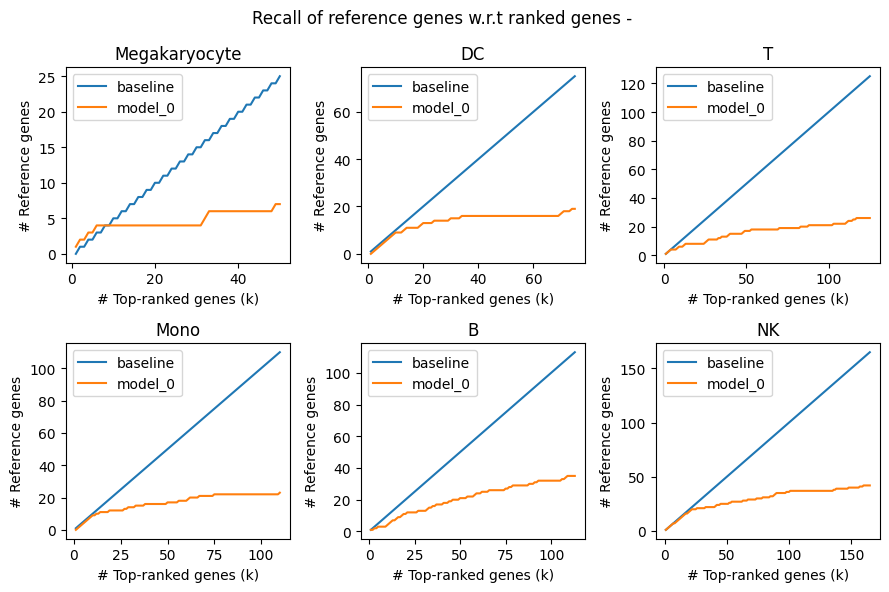

In [5]:
# Create object for gene recall curve.
grc = gene_recall_curve.GeneRecallCurve(reference_genes_path=reference_genes_path,    # Reference genes csv path. Required.
                                        ranked_genes_path_dict=
                                            {                                         # Dictionary of ranked genes csv path per model. Required in this case.
                                            'model_0': ranked_genes_df1_path,
                                            # 'model_1': ranked_genes_df2_path,
                                            },
                                        top_K=50,               # Top K ranks in which gene recall is to be checked. Optional - default: 100
                                        plots_per_row = 3,      # Number of plots per row. Optional
                                        save_plots=False        # Whether to save plot or not. Optional - default: True
                                        )

## save_plots is `False` here. But if you want to store plots, then consider making `save_plots` to True &
## add `dirpath` in `generate_analysis()` below.

# Generate gene recall curve
grc.generate_analysis()

#### <span style="color: steelblue;">Compare multiple models gene recall in one plot</span>

- We can send multiple model ranked genes csv path to compare gene recall within same plot.
- We just need to pass list of ranked genes csv path in `ranked_genes_path` in `GeneRecallCurve()` class.

![Alt text](./multi_model_gene_recall_comparison.png)

### <span style="color: steelblue;">2. Gene recall using score_matrix</span>
- If you want to generate gene recall using the score_matrix, don't pass anything for `ranked_genes_path` in
  GeneRecallCurve(), you can pass `score_matrix` in `generate_analysis(score_matrix=score_matrix)` after
  creating GeneRecallCurve() object.

- If you have mentioned `ranked_genes_path` & also given score_matrix to `generate_analysis()`, then
  `ranked_genes_path` will be given more priority and that will be used to generate gene recall.

- What all you require to generate gene recall using this method?
  Answer:
    1. reference genes dataframe.
    2. `score_matrix`
    3. `feature_selector` method - this you can find inside `scalr/feature/selector` - example below. 

In [6]:
score_matrix = pd.read_csv('./score_matrix.csv', index_col=0)
score_matrix

# score_matrix should look like below. score_matrix have a score for each gene per category. Categories are in rows.
# Category names should match with reference genes dataframe categories. E.g. D, DC, etc...

,RP11-34P13.7,RP11-34P13.8,RP11-34P13.9,FO538757.3,FO538757.2,AP006222.2,RP4-669L17.10,RP5-857K21.4,RP11-206L10.9,FAM87B,...,CCR4,GLB1,TMPPE,CRTAP,SUSD5,FBXL2,UBP1,CLASP2,RP11-10C24.2,RP11-10C24.3
B,1.238185e-05,-6.847002e-07,-0.000003,2.024599e-06,-0.001056,-0.000075,-0.000001,-1.232788e-06,0.000038,0.000001,...,-0.000017,-0.000488,-0.000027,-0.001425,1.476119e-05,0.000007,-0.000362,-0.000172,-2.936477e-06,-0.000005
DC,-1.451532e-05,2.267294e-06,-0.000003,8.755631e-08,-0.000121,0.000198,-0.000015,-2.591668e-06,0.000089,0.000006,...,-0.000013,0.000864,-0.000012,-0.000071,-5.695933e-06,0.000070,-0.000154,0.000361,-3.647227e-06,0.000006
Megakaryocyte,-1.221816e-05,-5.374027e-07,0.000001,3.707949e-06,-0.000859,-0.000205,-0.000007,-3.086494e-06,-0.000088,-0.000002,...,-0.000017,-0.000205,-0.000021,-0.000048,-4.779875e-06,-0.000035,-0.000167,-0.000211,8.653942e-06,0.000001
Mono,1.922455e-05,1.590744e-06,0.000010,-2.490713e-06,0.003388,-0.000031,0.000008,6.016299e-08,-0.000073,0.000005,...,-0.000091,0.001115,0.000126,0.006109,1.659194e-07,-0.000059,0.001579,0.000381,7.284415e-06,0.000013
NK,-5.738713e-06,-6.974244e-07,-0.000003,5.681806e-07,-0.000668,0.000014,-0.000017,-1.502438e-06,-0.000057,-0.000003,...,-0.000030,-0.000419,-0.000030,-0.001593,-1.195043e-06,-0.000025,-0.000287,-0.000099,-3.381829e-07,-0.000009
T,8.658000e-07,-1.938510e-06,-0.000002,-3.897572e-06,-0.000683,0.000098,0.000031,8.353225e-06,0.000090,-0.000007,...,0.000168,-0.000867,-0.000036,-0.002973,-3.256260e-06,0.000043,-0.000609,-0.000261,-9.016468e-06,-0.000005


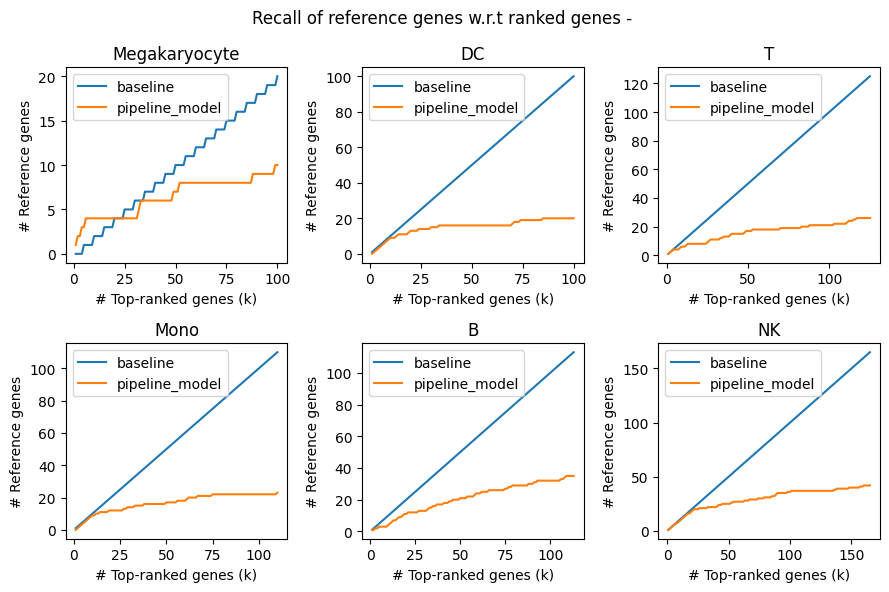

In [7]:
# Create object for gene recall curve
grc = gene_recall_curve.GeneRecallCurve(reference_genes_path,   # Reference genes csv path. Required.
                                        top_K=100,              # Top K ranks in which gene recall is to be checked. Optional - default: 100
                                        plots_per_row=3,        # Number of plots per row. Optional
                                        save_plots=False,       # Whether to save plot or not. Optional - default: True
                                        features_selector=
                                            {
                                                'name': 'ClasswisePromoters',  # Mention aggregation strategy here.
                                                'params': {}                   # Mention params like `k` here.
                                            }
                                        )

# save_plots is `False` here. But if you want to store plots, then consider making `save_plots` to True &
# add `dirpath` in `generate_analysis()` below.

# Generate gene recall curve
grc.generate_analysis(score_matrix=score_matrix)

# <span style="color: steelblue;">Interpretation of gene recall curve using comparison example</span>


![Alt text](./multi_model_gene_recall_comparison.png)

- As stated in section `1 of Gene Recall - Using ranked genes csv`, we can plot multiple models gene recall curves in single plot by passing list of ranked genes csv of each model.
- Lets understand `Mono_Cell` behavior from the above gene recall curve.
    - We can see the spike in the curve for `model_1` in top 100 as compared to `model_0`. This indicates that more of literature(important) genes for cell Mono are found using `model_1` than `model_0`.
    Hence, we can consider model_1 for further analysis of genes for Mono Cell.
    
    
    
    Disclaimer: This is an example figure for explaination purposes.